Veri seti ABD'deki Ulusal Diyabet Sindirim Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki Arizona Eyaleti'nin en büyük 5.şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde yapılan diyabet araştırması için kullanılan verilerdir. Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

Adım 1: Genel resmi inceleyiniz.

In [1]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

In [2]:
cat_col=[i for i in df.columns if df[i].dtypes=="O"]
num_col=[i for i in df.columns if df[i].dtypes!="O"]
cat_col #burada kategorik değişken yok gibi gözüküyor


[]

In [3]:
#numerik anlamda bir bilgi içermeyip ama numeric gibi gözüken sütunları bulalım.
num_but_cat=[i for i in df.columns if df[i].nunique()<=2]
num_but_cat
#outcome değeri numeric değişken içerebilir ama aslında taşıdığı bilgi numeric değildir.

['Outcome']

Adım 3:  Numerik ve kategorik değişkenlerin analizini yapınız.

Adım 4:Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)

In [4]:
df.groupby(["Outcome"]).agg({"Pregnancies":"mean",
                             "Glucose":"mean",
                             "BloodPressure":"mean",
                             "SkinThickness":"mean",
                             "Insulin":"mean",
                             "BMI":"mean",
                             "DiabetesPedigreeFunction":"mean",
                             "Age":"mean"})

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Adım 5: Aykırı gözlem analizi yapınız.

In [5]:
#outlier threshold belirleme fonk
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [6]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

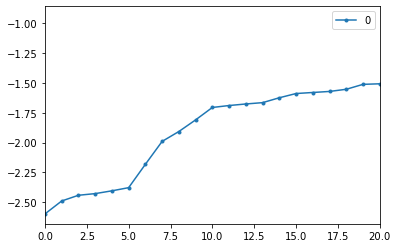

In [9]:
#Loc analizi yapıyorum ek olarak
import matplotlib.pyplot as plt

import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf=LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)
df_scores=clf.negative_outlier_factor_
scores=pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0,20],style='.-')
plt.show()

In [429]:
def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False
for i in df.columns:
  print(i, check_outlier(df, i))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True
Outcome False


In [430]:
#th=np.sort(df_scores)[10]
#df[df_scores<th].shape     #çok büyük bir veri kaybı olacağı için 

Adım 6: Eksik gözlem analizi yapınız.

In [431]:
df.isnull().sum() #eksik değer göremiyorum

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Adım 7: Korelasyon analizi yapınız.


In [432]:
verinum=[i for i in df if df[i].dtype in ["float64","int64"]]
corr=df[verinum].corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

Görev 2 : Feature Engineering
Adım 1:  Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb. değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0 olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik değerlere işlemleri uygulayabilirsiniz.

In [433]:
#önce içierisnde 0 değeri olan sütunları getiririm
import numpy as np
sıfır_var = [i for i in df.columns if df[i].min()==0 and i not in ["Pregnancies","Outcome"]]
sıfır_var 
df[df[sıfır_var] == 0] = np.nan
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

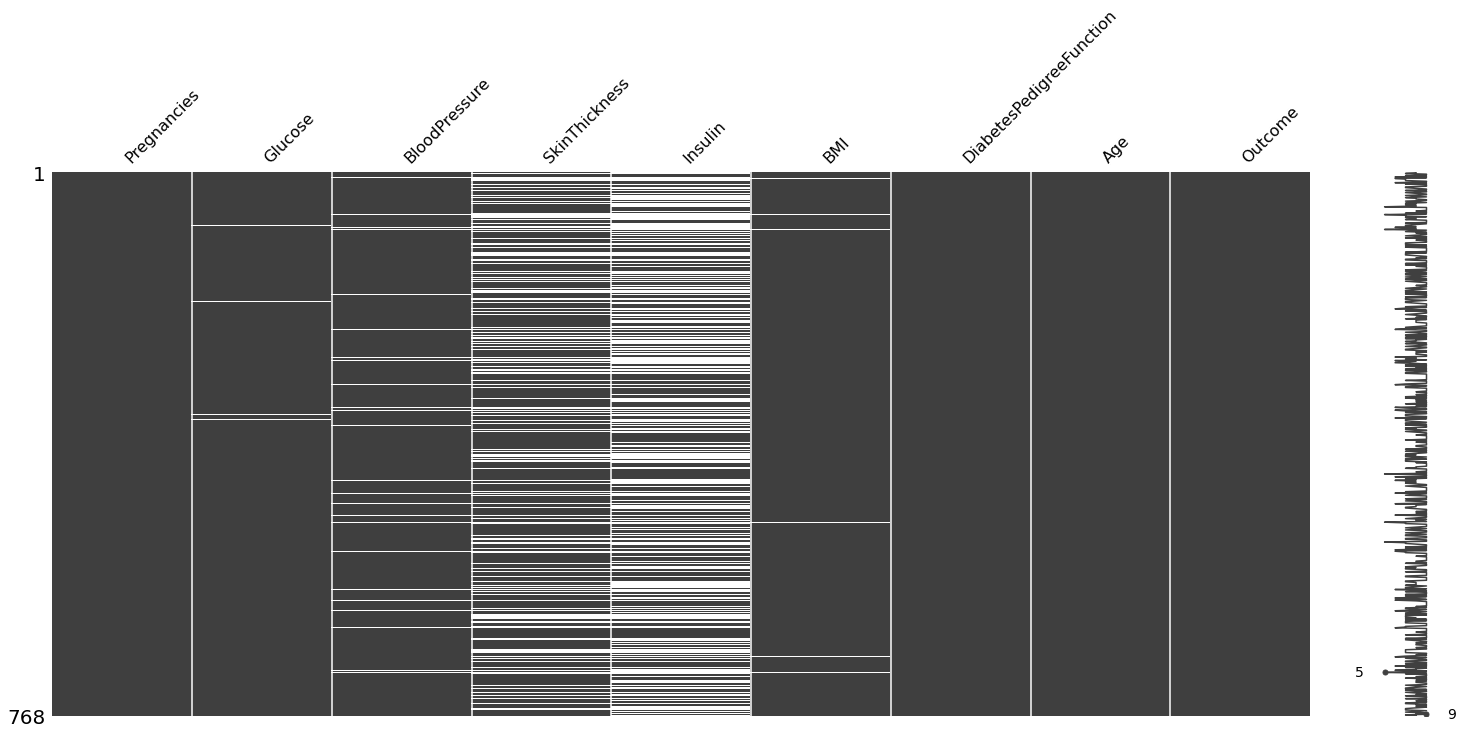

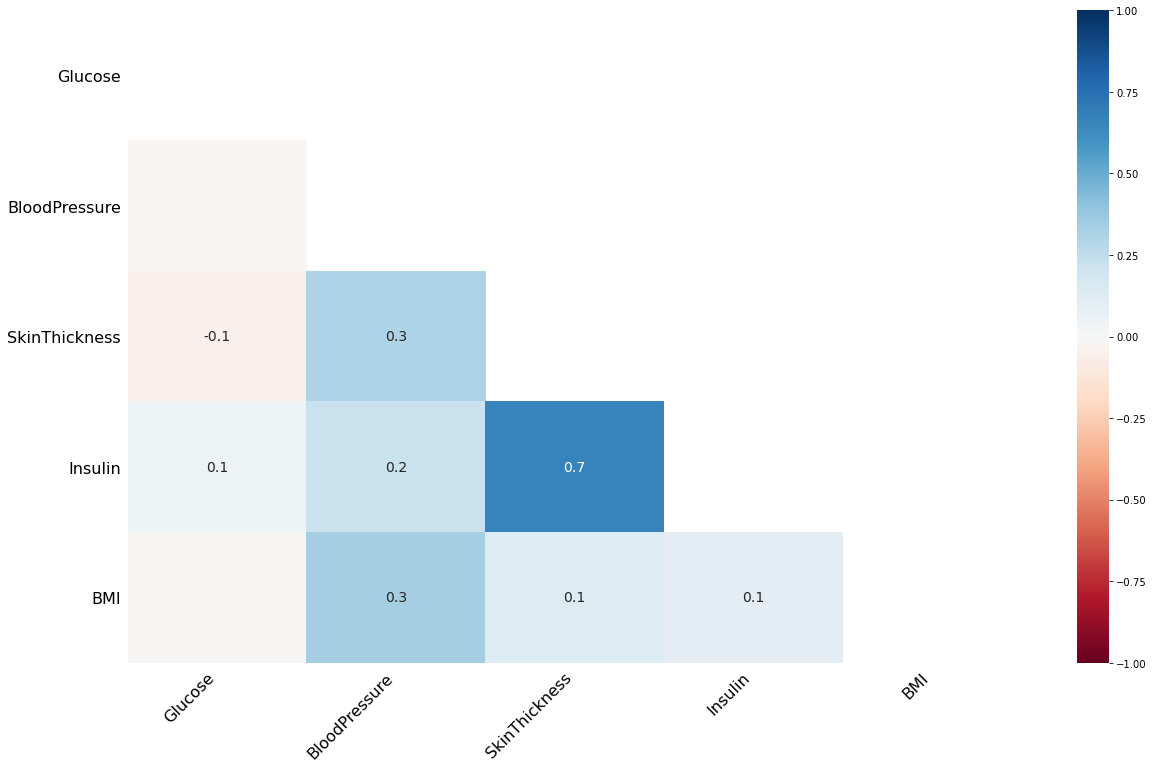

In [434]:
import missingno as msno

msno.matrix(df)
plt.show()
msno.heatmap(df)
plt.show()  # skin thickness ve insülin arasında 0.7 oranında bir korelasyon var. Birlikte ortaya çıkmış olabilir.


In [435]:
df= pd.get_dummies(df, columns=["Outcome"], drop_first=True)

In [436]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1
0,0.352941,0.670968,0.489796,0.304348,NaN,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,NaN,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,NaN,NaN,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [437]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1
0,0.352941,0.670968,0.489796,0.304348,0.384856,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.050721,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.273913,0.269231,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [438]:
df=pd.DataFrame(scaler.inverse_transform(df),columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [439]:
for i in df.columns:
    if i!="Outcome_1" and check_outlier(df,i):
        replace_with_thresholds(df,i)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,150.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,26.4,122.4,30.1,0.349,47.0,1.0


Adım 2: Yeni değişkenler oluşturunuz.

In [440]:
mylabelsage=["yasli","orta","genç"]
df['new_age']=pd.cut(df.Age, bins=3, labels=mylabelsage)

mylabelsbmı=["obez","normal","zayıf"]
df["new_bmı"]=pd.cut(df.Age, bins=3, labels=mylabelsbmı)


Adım 3:  Encoding işlemlerini gerçekleştiriniz

In [441]:
def rare_encoder(dataframe,rare_perc):
    temp_df=dataframe.copy()
    
    rare_columns=[col for col in temp_df.columns if temp_df[col].dtypes=="O"
                 and (temp_df[col].value_counts()/len(temp_df)<rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp=temp_df[var].value_counts()/len(temp_df)
        rare_labels= tmp[tmp<rare_perc].index
        temp_df[var]=np.where(temp_df[var].isin(rare_labels),"Rare",temp_df[var])
    return temp_df

new_df=rare_encoder(df,0.01)
new_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1,new_age,new_bmı
0,6.0,148.0,72.0,35.0,334.2,33.6,0.627,50.0,1.0,orta,normal
1,1.0,85.0,66.0,29.0,56.2,26.6,0.351,31.0,0.0,yasli,obez
2,8.0,183.0,64.0,32.2,238.0,23.3,0.672,32.0,1.0,yasli,obez
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,yasli,obez
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1.0,yasli,obez
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0,genç,zayıf
764,2.0,122.0,70.0,27.0,150.0,36.8,0.340,27.0,0.0,yasli,obez
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0,yasli,obez
766,1.0,126.0,60.0,26.4,122.4,30.1,0.349,47.0,1.0,orta,normal


Model oluşturunuz.

In [443]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

y = df["Outcome_1"]
X = df.drop(["Outcome_1","new_age","new_bmı"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7835497835497836